In [38]:
import numpy as np
import matplotlib.pyplot as plt
import os

import GPy

In [39]:
os.chdir('/home/saumya/Documents/Spec_data/boltz')

In [40]:
x_dat = np.load('abs.npy').astype(np.half)

# x_dat = np.reshape(x_dat, -1)[:, None]

In [41]:
x_dat.shape

(10000, 3000)

In [42]:
os.chdir('/home/saumya/Documents/Flame_dianostics-temperature_profile_estimation_using_ML/spec_data/parameters_bolt')


In [43]:
y_dat = np.load('param.npy')

# y_dat = np.reshape(y_dat, -1)[:, None]

# y_dat = y_dat[:10000]

In [44]:
y_dat.shape

(10000, 3)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
def train_val_test_split(X, y, val_size):
    # test_size = 1 - train_size - val_size
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = val_size)
    # relative_train_size = train_size / (val_size + train_size)
    # X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                    #   train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train_val, X_test, y_train_val, y_test

In [47]:
X_train, X_test, Y_train, Y_test = train_val_test_split(x_dat, y_dat, .2)

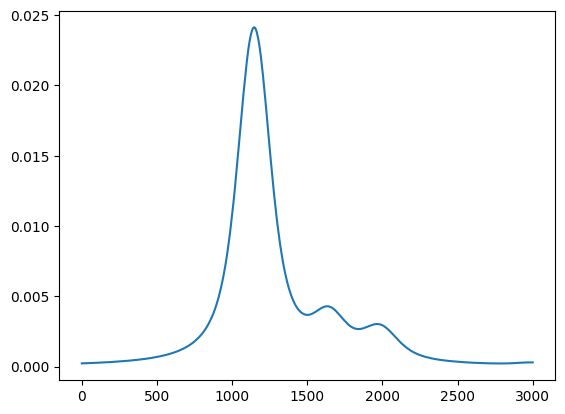

In [48]:
plt.plot(x_dat[50])

In [49]:
# LMC set up
ks = [GPy.kern.RBF(np.shape(X_train)[1]) for i in range(1)]
icm = GPy.util.multioutput.LCM(input_dim=np.shape(X_train)[1],num_outputs=1,kernels_list=ks)

In [50]:
print(icm)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)

  ICM0.            |         value  |  constraints  |  priors
  rbf.variance     |           1.0  |      +ve      |        
  rbf.lengthscale  |           1.0  |      +ve      |        
  B.W              |  [0.61010737]  |               |        
  B.kappa          |           0.5  |      +ve      |        
W matrix
   index  |    ICM0.B.W  |  constraints  |  priors
  [0 0]  |  0.61010737  |               |        

kappa vector
   index  |  ICM0.B.kappa  |  constraints  |  priors
  [0]    |    0.50000000  |      +ve      |        

B matrix
 [[0.87223101]]


In [51]:
m = GPy.models.GPCoregionalizedRegression([X_train],[Y_train],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)

In [ ]:
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)

W matrix
   index  |  gp.ICM0.B.W  |  constraints  |  priors
  [0 0]  |  -0.94934831  |               |        

kappa vector
   index  |  gp.ICM0.B.kappa  |  constraints  |  priors
  [0]    |       0.50000000  |      +ve      |        


In [ ]:
m.optimize()

In [ ]:
print(m)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 1707.8868821887118
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |                  value  |  constraints  |  priors
  ICM0.rbf.variance                      |                    1.0  |   +ve fixed   |        
  ICM0.rbf.lengthscale                   |    0.19772057200954662  |      +ve      |        
  ICM0.B.W                               |        [-352.57863681]  |               |        
  ICM0.B.kappa                           |  8.217984867727087e-22  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |    0.08506061306498577  |      +ve      |        
W matrix
   index  |  gp.ICM0.B.W  |  constraints  |  priors
  [0 0]  |  -352.57863681  |               |        

kappa vector
   index  |  gp.ICM0.B.kappa  |  constraints  |  priors
  [0]    |       0.00000000  |      +ve      |        

B matrix
 [[124311.69513465]]


In [ ]:
newX = X_test

In [ ]:
newX = np.concatenate((newX,np.zeros((np.shape(X_test)[0],1))),1)
noise_dict = {'output_index':newX[:,-1].astype(int)}
ys,var=m.predict(newX,Y_metadata=noise_dict)

# Temper_test_=scalerT.inverse_transform(ys)


In [ ]:
ys

array([[1798.49803972],
       [1928.48136286],
       [2176.46547019],
       ...,
       [2154.51222733],
       [2009.45669668],
       [1672.48849914]])

In [ ]:
Y_test

array([[1798.64986499],
       [1928.79287929],
       [2176.61766177],
       ...,
       [2154.91549155],
       [2009.7209721 ],
       [1672.07720772]])

In [ ]:
from sklearn import metrics

In [ ]:
conc_1 = metrics.mean_squared_log_error(np.array(ys), np.array(Y_test))
conc_1

2.6752493475026038e-08

In [ ]:
conc_1 = metrics.mean_squared_error(np.array(ys), np.array(Y_test))
print(f'The mean squared error between the real and predicted values are: {conc_1}')

The mean squared error between the real and predicted values are: 0.08853491243677762
